<a href="https://colab.research.google.com/github/KesavaAI/OATH_INTERNSHIP/blob/main/OATH_INTERNSHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
import networkx as nx

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/OATH-INTERNSHIP/startup_funding.csv')
print(data)


      Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
3039   3040      29/01/2015                    Printvenue   
3040   3041      29/01/2015                      Graphene   
3041   3042      30/01/2015                Mad Street Den   
3042   3043      30/01/2015                     Simplotel   
3043   3044      31/01/2015              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Retailer of baby and toddler product

In [ ]:
# Convert 'Amount in USD' column to string type
data['Amount in USD'] = data['Amount in USD'].astype(str)

# Remove commas and convert numeric values to float for 'Amount in USD'
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'].str.replace(',', ''), errors='coerce')

# Fill missing values in 'Amount in USD' with median
median_amount = data['Amount in USD'].median()
data['Amount in USD'].fillna(median_amount, inplace=True)

# Define the list of categorical columns
categorical_columns = ['Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Remarks']

# Fill missing values in categorical columns with their respective modes
for column in categorical_columns:
    mode_value = data[column].mode().iloc[0]  # Calculate mode for the column
    data[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Check for missing values after filling
print("Missing Values After Filling:")
print(data.isnull().sum())

# Check for missing values in categorical columns after filling
print("Missing Values After Filling Categorical Columns:")
print(data[categorical_columns].isnull().sum())

Missing Values After Filling:
Sr No                0
Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
Remarks              0
dtype: int64
Missing Values After Filling Categorical Columns:
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Remarks              0
dtype: int64


analysis

In [ ]:
industry_funding_corr = data.groupby('Industry Vertical')['Amount in USD'].median().sort_values(ascending=False)
print(industry_funding_corr.head(10))  # Display the top 10 industries by median funding amount


Industry Vertical
E-Commerce & M-Commerce platform      680000000.0
Ecommerce Marketplace                 500000000.0
Car Aggregator & Retail Mobile App    500000000.0
Cab Aggregator                        400000000.0
Online Marketplace                    350071500.0
Automation                            300000000.0
B2B                                   293500000.0
B2B Platform                          225000000.0
E-Tech                                200000000.0
Online Classifieds                    150000000.0
Name: Amount in USD, dtype: float64


In [ ]:
# Convert 'Date dd/mm/yyyy' column to datetime format (handling the non-zero-padded month)
data['Date dd/mm/yyyy'] = pd.to_datetime(data['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
# Displaying the modified 'data' DataFrame after converting the date column
print(data)
# Grouping data by month and year and calculating total funding amount per month
monthly_funding = data.groupby(data['Date dd/mm/yyyy'].dt.to_period('M'))['Amount in USD'].sum()
print(monthly_funding)

      Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      2020-01-09                        BYJU’S   
1         2      2020-01-13                        Shuttl   
2         3      2020-01-09                     Mamaearth   
3         4      2020-01-02  https://www.wealthbucket.in/   
4         5      2020-01-02                        Fashor   
...     ...             ...                           ...   
3039   3040      2015-01-29                    Printvenue   
3040   3041      2015-01-29                      Graphene   
3041   3042      2015-01-30                Mad Street Den   
3042   3043      2015-01-30                     Simplotel   
3043   3044      2015-01-31              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Retailer of baby and toddler product

In [ ]:
city_funding = data.groupby('City  Location')['Amount in USD'].median().sort_values(ascending=False)
print(city_funding.head(10))  # Display the top 10 cities by median funding amount


City  Location
Menlo Park         450000000.0
California         300000000.0
India/Singapore    226000000.0
Tulangan           200000000.0
Kormangala         142000000.0
San Jose,          135000000.0
Santa Monica       110000000.0
San Francisco       93500000.0
New York            52000000.0
Palo Alto           51000000.0
Name: Amount in USD, dtype: float64


In [ ]:
investor_funding = data.groupby('Investors Name')['Amount in USD'].sum().sort_values(ascending=False)
print(investor_funding.head(10))  # Display the top 10 investors by total funding amount


Investors Name
Westbridge Capital                          3.900000e+09
Softbank                                    2.500000e+09
SoftBank Group                              1.462000e+09
Microsoft, eBay, Tencent Holdings           1.400000e+09
Vijay Shekhar Sharma                        1.003550e+09
Steadview Capital and existing investors    7.000000e+08
Undisclosed Investors                       6.800120e+08
Alibaba Group, Ant Financial                6.800000e+08
Altimeter Capital, DST Global               5.850000e+08
SoftBank Vision Fund                        5.310000e+08
Name: Amount in USD, dtype: float64


In [ ]:
# Convert datetime column to timestamp
X['Date dd/mm/yyyy'] = pd.to_datetime(X['Date dd/mm/yyyy'])
X['Date dd/mm/yyyy'] = X['Date dd/mm/yyyy'].astype(np.int64) // 10**9  # Convert to seconds

# Perform one-hot encoding for categorical columns
X_encoded = pd.get_dummies(X)

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model on the encoded training data
rf.fit(X_train_encoded, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train_encoded.columns)
print(feature_importance.sort_values(ascending=False).head(10))  # Display top 10 important features


SubVertical_Bike Taxi                               0.187624
Investors Name_Westbridge Capital                   0.136449
Investors Name_Microsoft, eBay, Tencent Holdings    0.102783
Investors Name_SoftBank Group                       0.081527
Startup Name_Rapido Bike Taxi                       0.078965
SubVertical_Mobile Wallet & ECommerce platform      0.037745
InvestmentnType_Funding Round                       0.036726
Startup Name_Paytm                                  0.034294
Startup Name_Flipkart                               0.023970
SubVertical_Mobile Wallet                           0.018777
dtype: float64


**visualization**

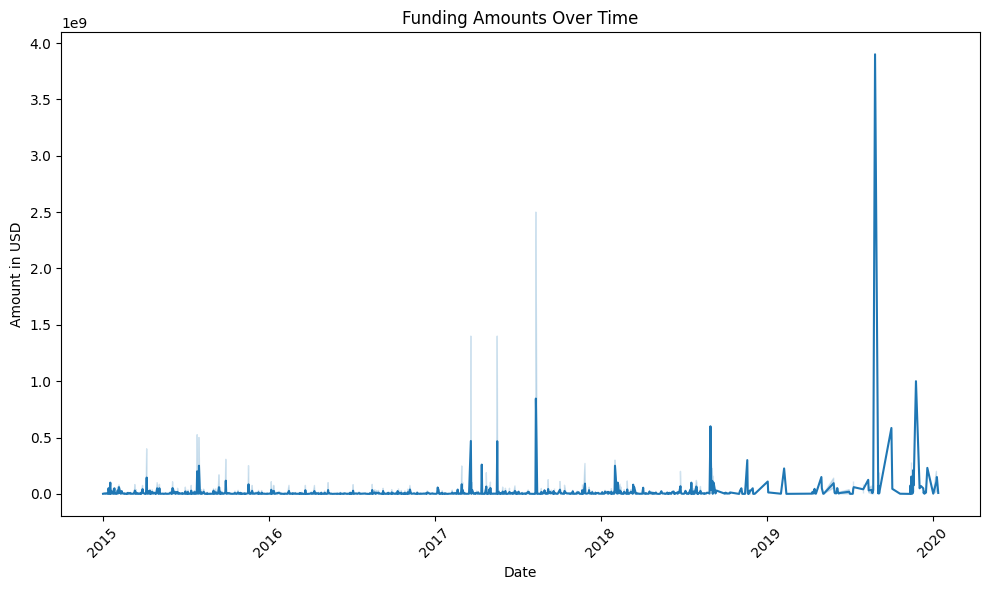

In [ ]:
# 1. Time series plot of funding amounts over the dataset period
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date dd/mm/yyyy', y='Amount in USD', data=data)
plt.title('Funding Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Amount in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

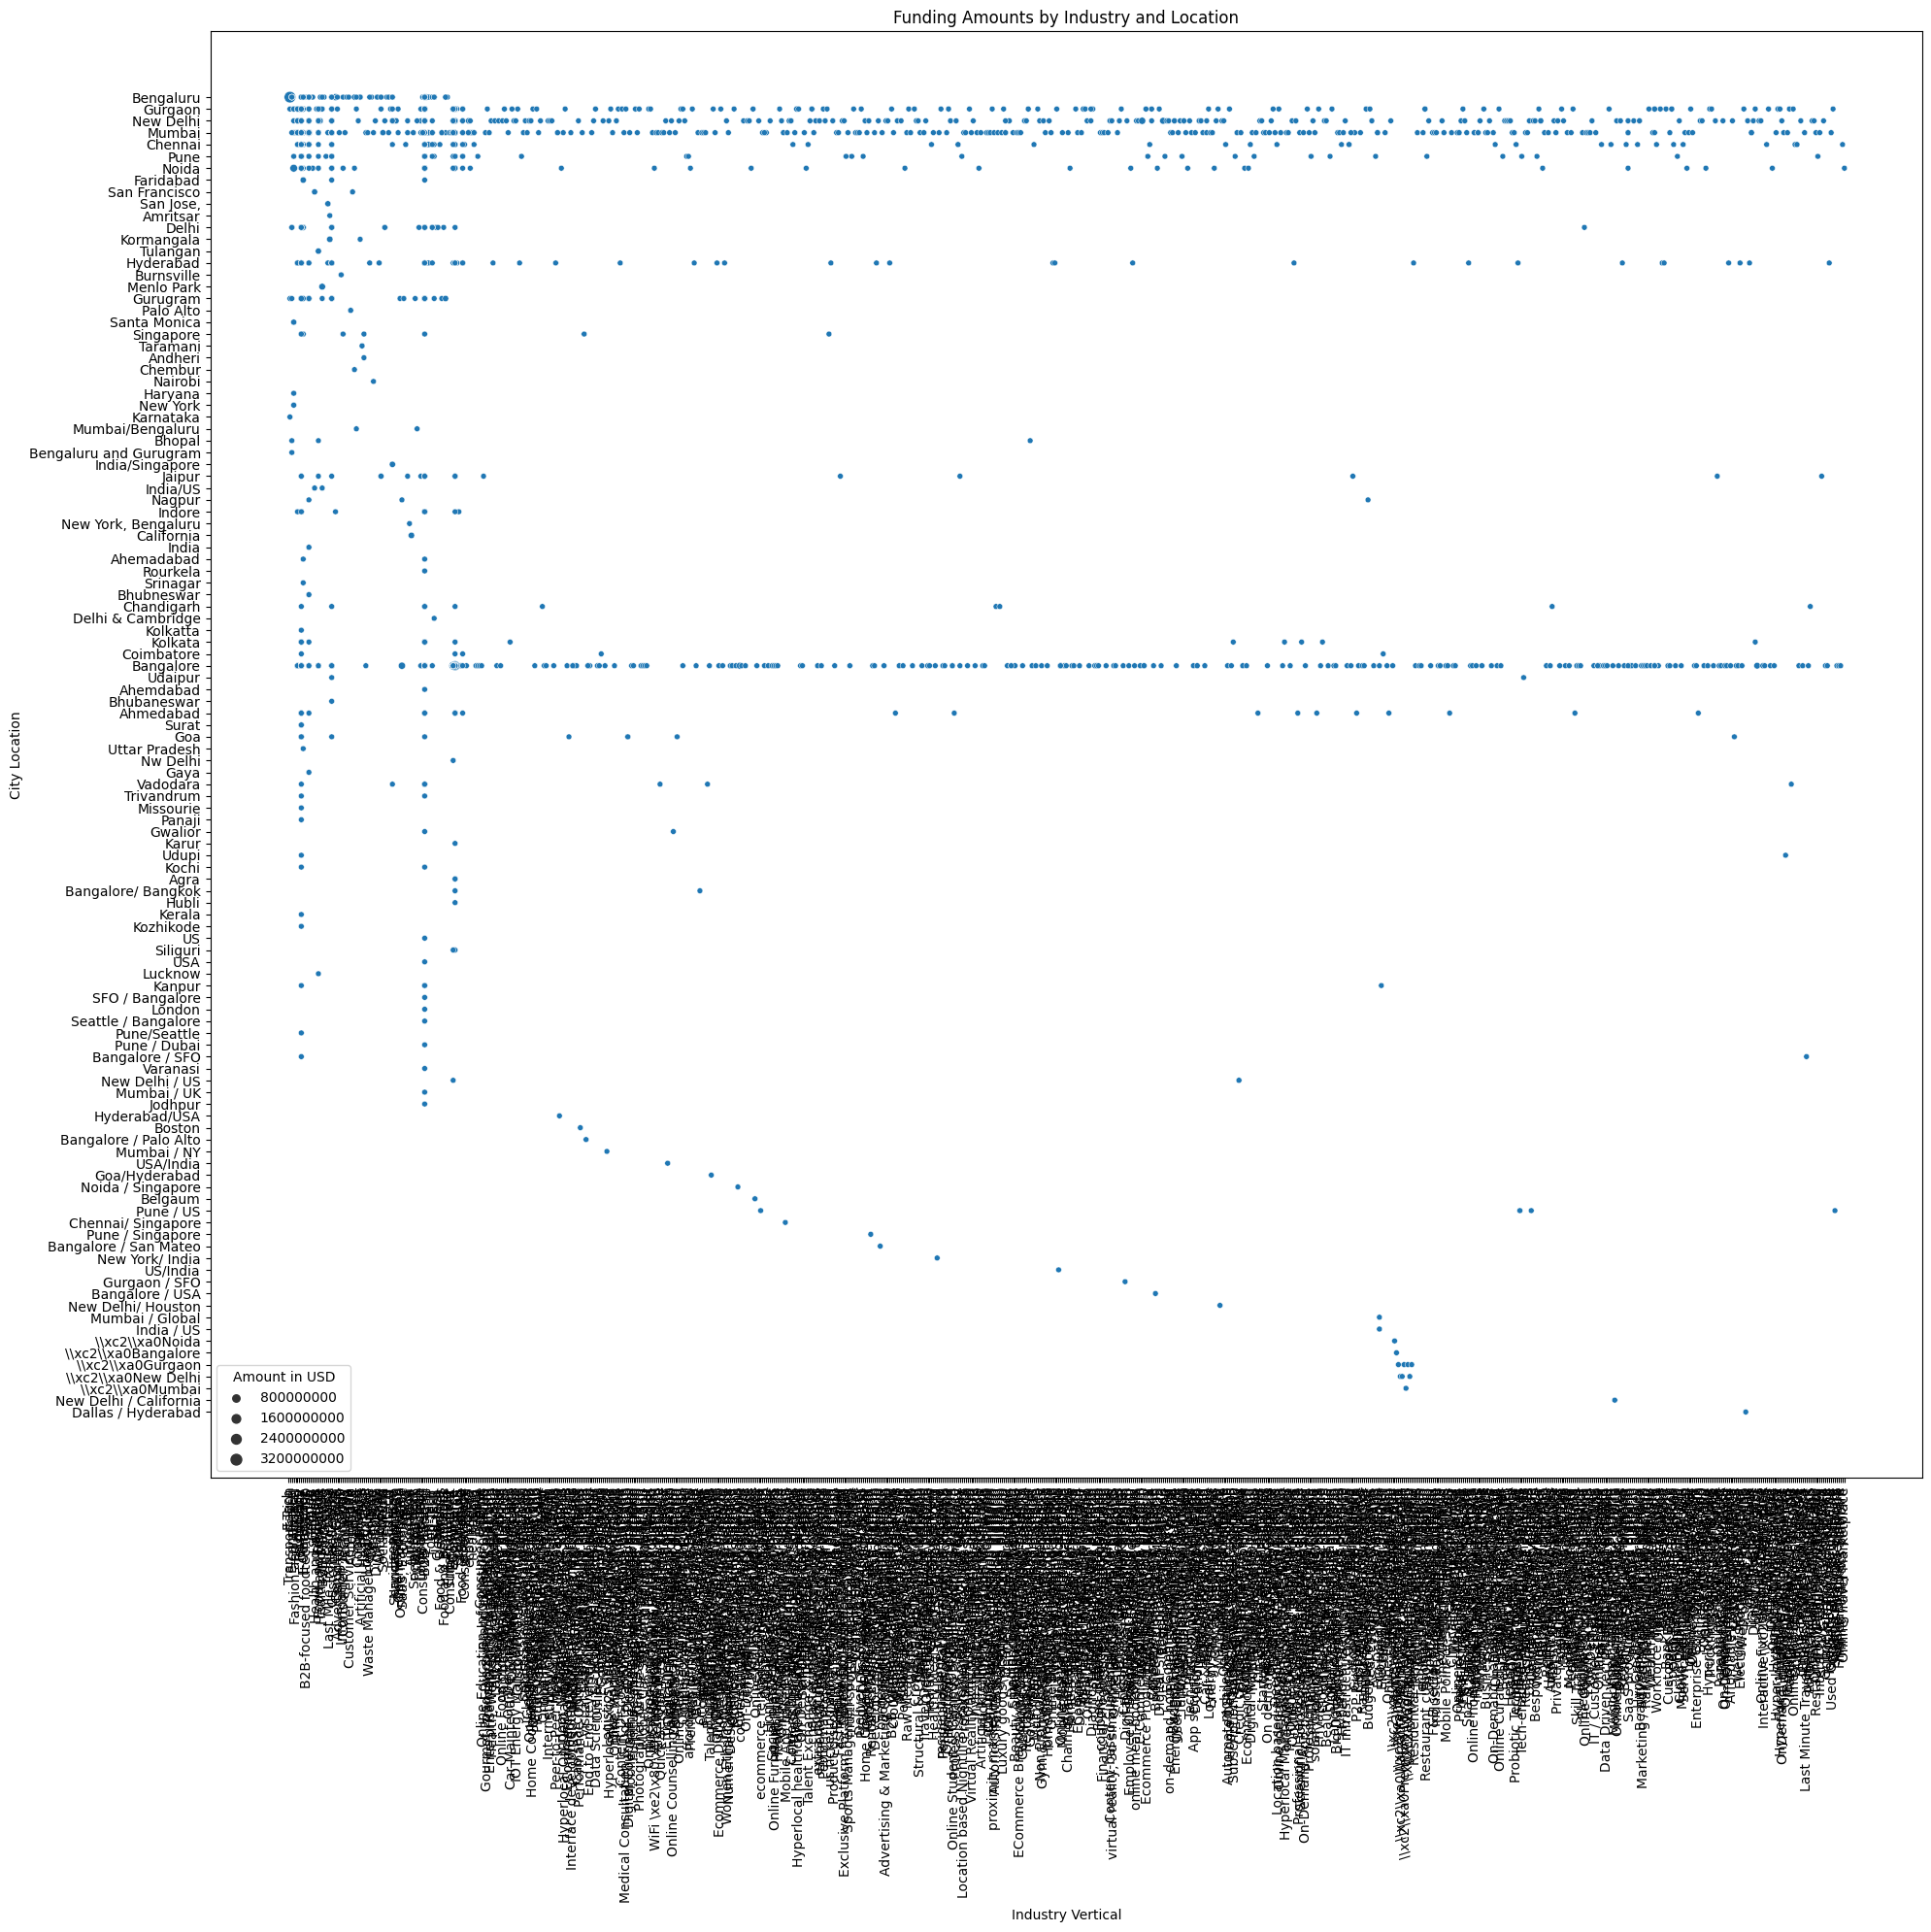

In [ ]:
# 2. Bubble chart displaying funding amounts by industry and location
plt.figure(figsize=(20, 20))
sns.scatterplot(x='Industry Vertical', y='City  Location', size='Amount in USD', data=data)
plt.title('Funding Amounts by Industry and Location')
plt.xlabel('Industry Vertical')
plt.ylabel('City Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-16-4b3a623b0934>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


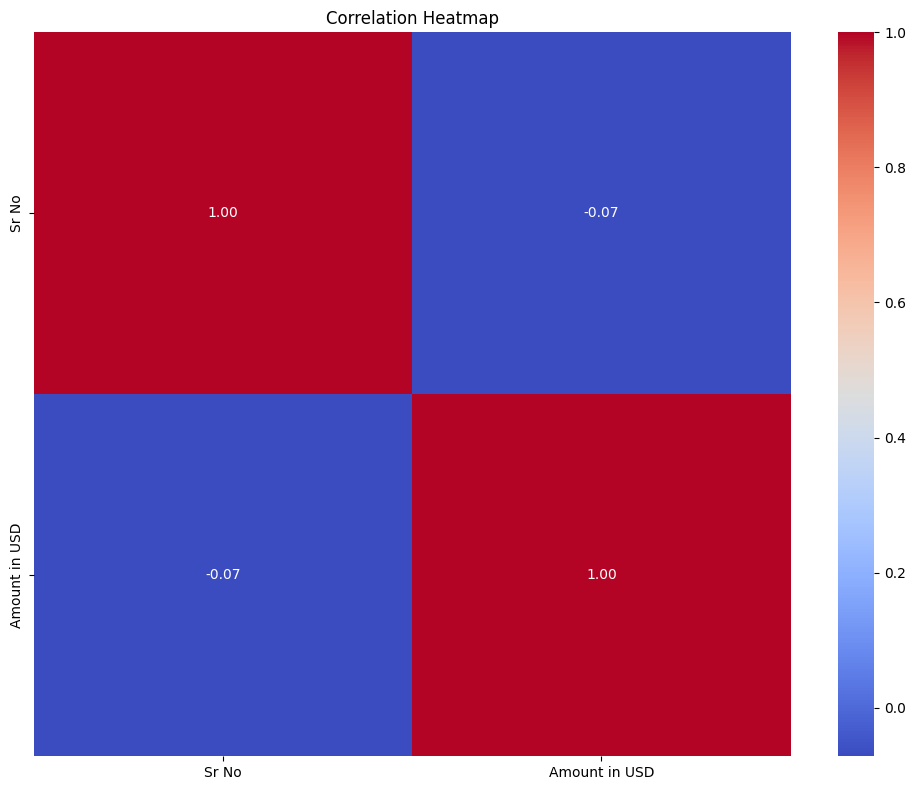

In [ ]:
# 3. Heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

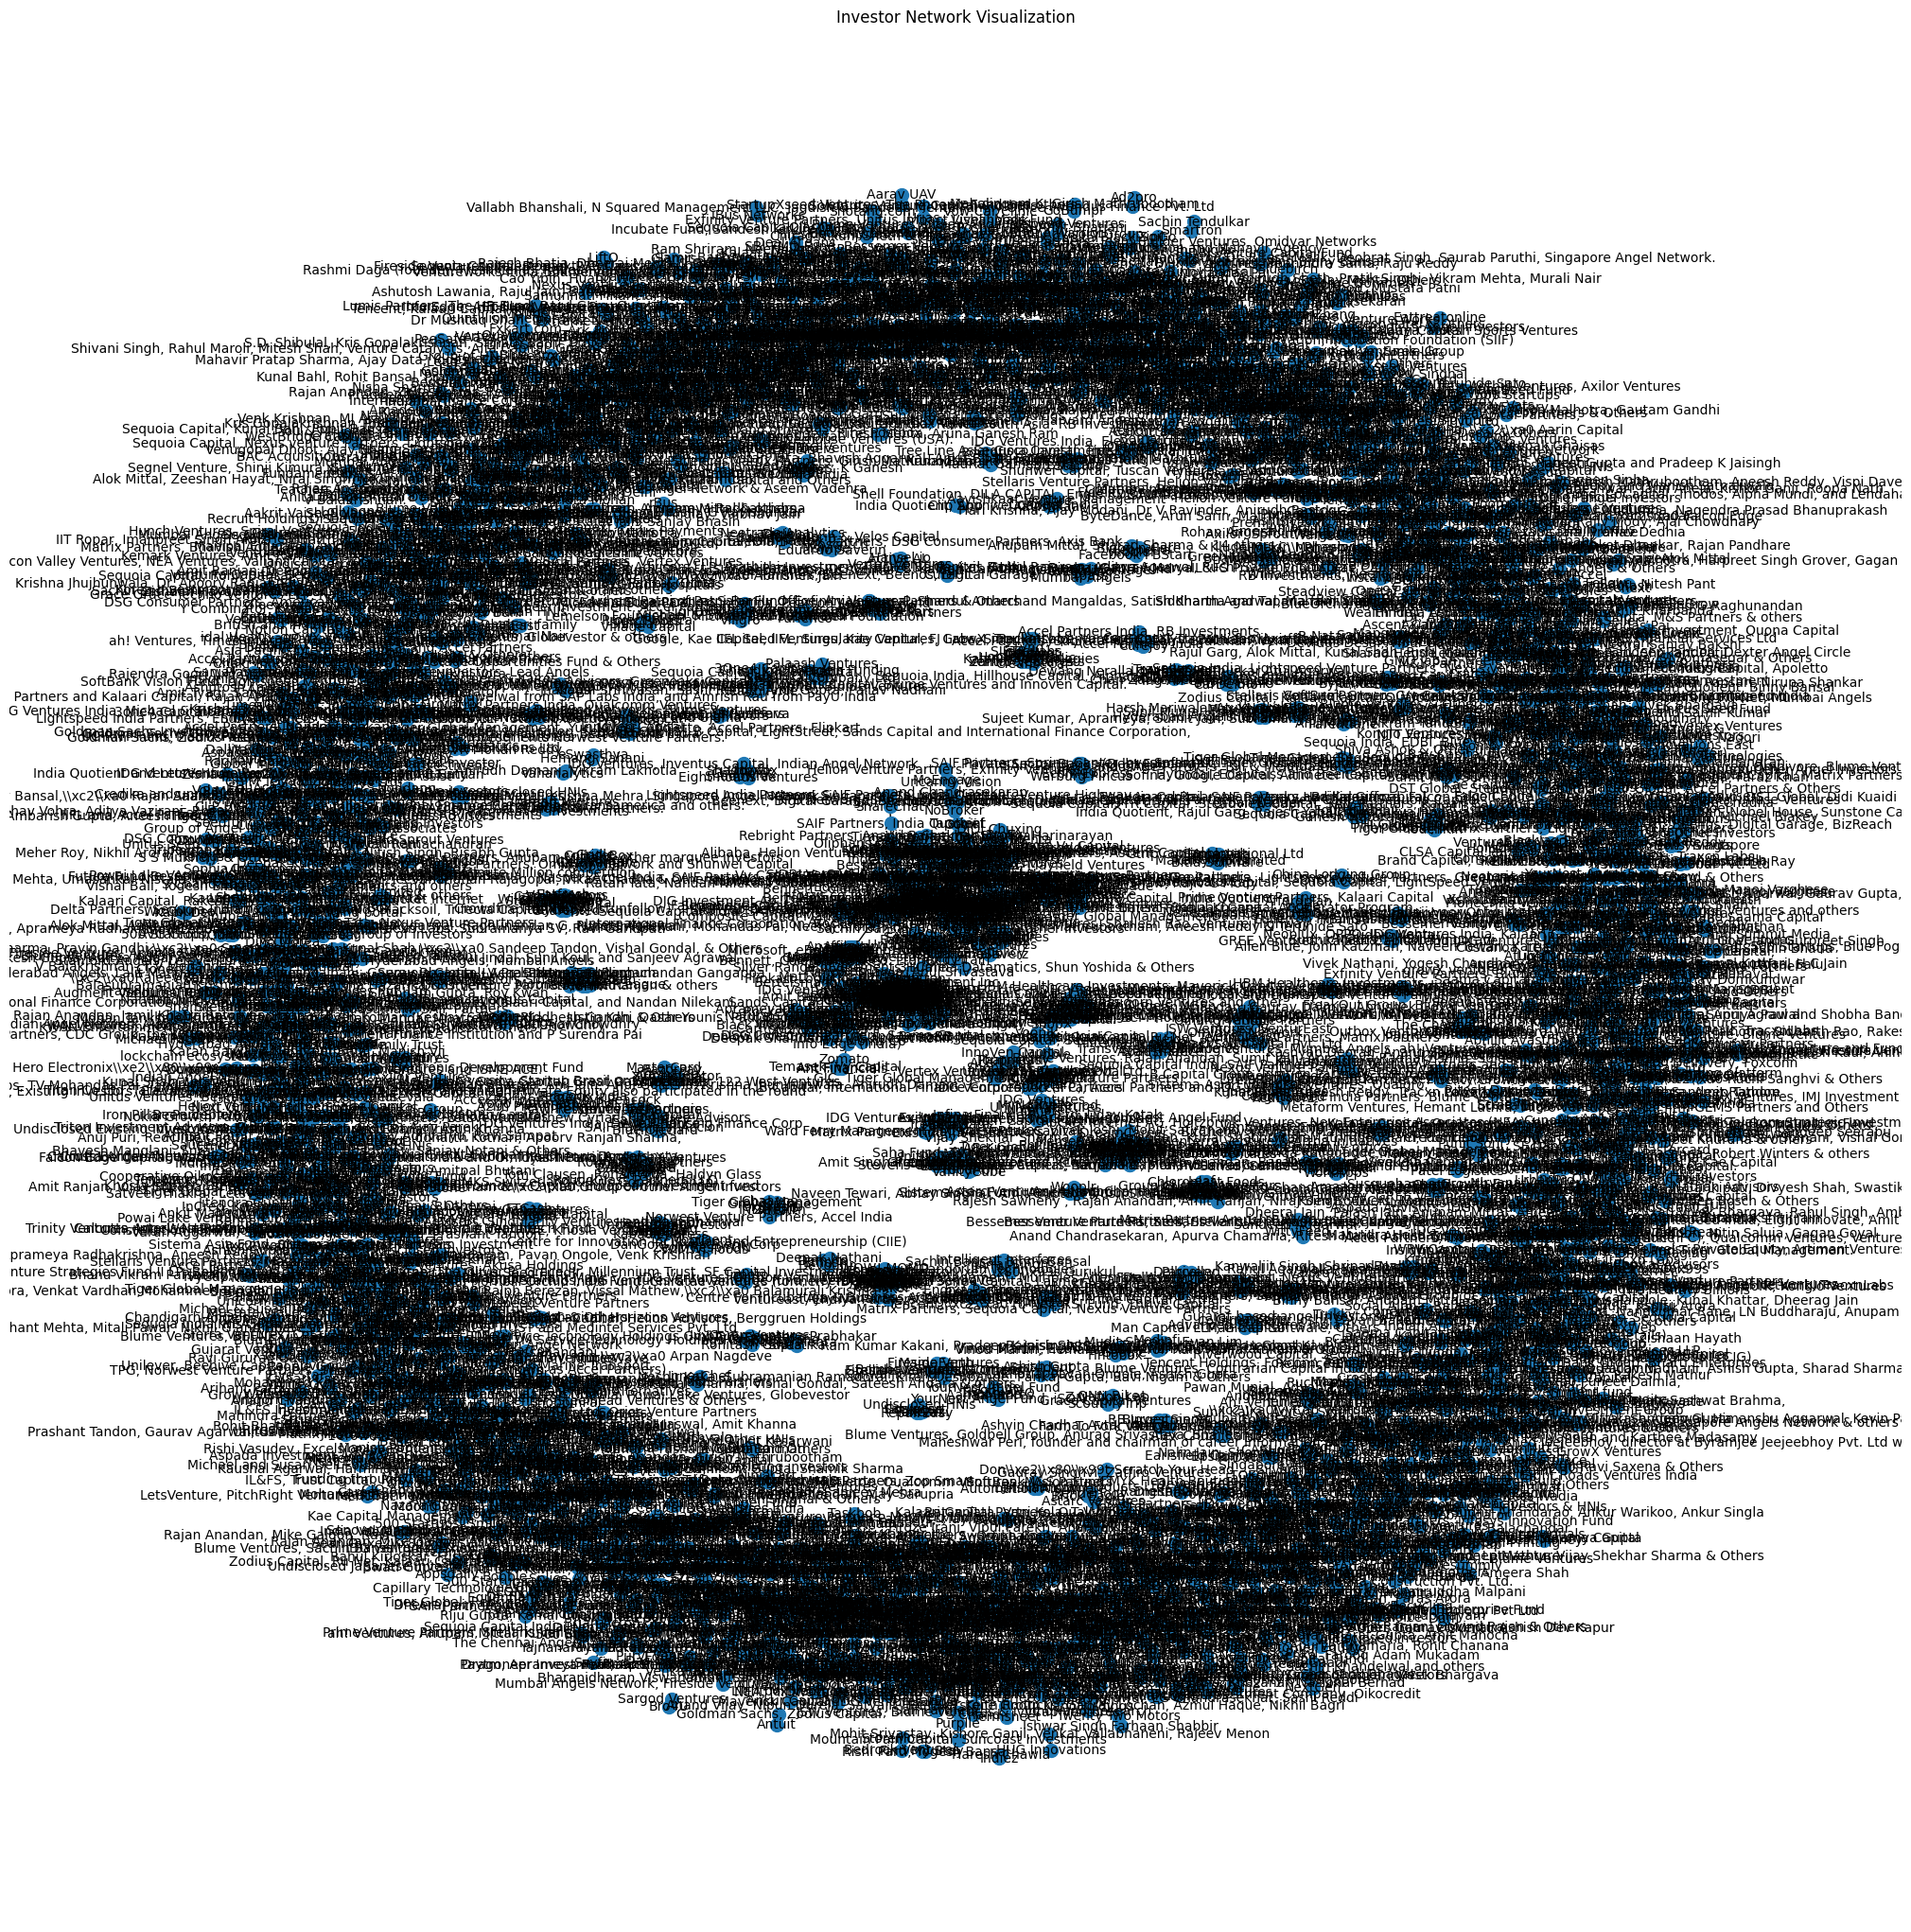

In [ ]:
# Group the data by investors and collect associated startups
investor_startup = data.groupby('Investors Name')['Startup Name'].apply(list).to_dict()

# Create a list of edges between investors and startups
edges = [(investor, startup) for investor, startups in investor_startup.items() for startup in startups]

# Create a graph object and add edges
investor_network = nx.Graph()
investor_network.add_edges_from(edges)

# Visualization of the investor network
plt.figure(figsize=(20, 20))  # Adjust figure size as needed
pos = nx.spring_layout(investor_network)
nx.draw(investor_network, pos, with_labels=True, node_size=100, font_size=10)
plt.title('Investor Network Visualization')
plt.show()

In [ ]:

# Assuming your dataset is loaded into a variable called 'data'
cities = data['City  Location'].dropna().unique()
print(cities)


['Bengaluru' 'Gurgaon' 'New Delhi' 'Mumbai' 'Chennai' 'Pune' 'Noida'
 'Faridabad' 'San Francisco' 'San Jose,' 'Amritsar' 'Delhi' 'Kormangala'
 'Tulangan' 'Hyderabad' 'Burnsville' 'Menlo Park' 'Gurugram' 'Palo Alto'
 'Santa Monica' 'Singapore' 'Taramani' 'Andheri' 'Chembur' 'Nairobi'
 'Haryana' 'New York' 'Karnataka' 'Mumbai/Bengaluru' 'Bhopal'
 'Bengaluru and Gurugram' 'India/Singapore' 'Jaipur' 'India/US' 'Nagpur'
 'Indore' 'New York, Bengaluru' 'California' 'India' 'Ahemadabad'
 'Rourkela' 'Srinagar' 'Bhubneswar' 'Chandigarh' 'Delhi & Cambridge'
 'Kolkatta' 'Kolkata' 'Coimbatore' 'Bangalore' 'Udaipur' 'Ahemdabad'
 'Bhubaneswar' 'Ahmedabad' 'Surat' 'Goa' 'Uttar Pradesh' 'Nw Delhi' 'Gaya'
 'Vadodara' 'Trivandrum' 'Missourie' 'Panaji' 'Gwalior' 'Karur' 'Udupi'
 'Kochi' 'Agra' 'Bangalore/ Bangkok' 'Hubli' 'Kerala' 'Kozhikode' 'US'
 'Siliguri' 'USA' 'Lucknow' 'Kanpur' 'SFO / Bangalore' 'London'
 'Seattle / Bangalore' 'Pune/Seattle' 'Pune / Dubai' 'Bangalore / SFO'
 'Varanasi' 'New Delhi /

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame containing startup funding data
# Filter rows where 'City Location' information is available and extract unique cities
funding_cities = data[data['City  Location'].notnull()]['City  Location'].unique()

print(funding_cities)


['Bengaluru' 'Gurgaon' 'New Delhi' 'Mumbai' 'Chennai' 'Pune' 'Noida'
 'Faridabad' 'San Francisco' 'San Jose,' 'Amritsar' 'Delhi' 'Kormangala'
 'Tulangan' 'Hyderabad' 'Burnsville' 'Menlo Park' 'Gurugram' 'Palo Alto'
 'Santa Monica' 'Singapore' 'Taramani' 'Andheri' 'Chembur' 'Nairobi'
 'Haryana' 'New York' 'Karnataka' 'Mumbai/Bengaluru' 'Bhopal'
 'Bengaluru and Gurugram' 'India/Singapore' 'Jaipur' 'India/US' 'Nagpur'
 'Indore' 'New York, Bengaluru' 'California' 'India' 'Ahemadabad'
 'Rourkela' 'Srinagar' 'Bhubneswar' 'Chandigarh' 'Delhi & Cambridge'
 'Kolkatta' 'Kolkata' 'Coimbatore' 'Bangalore' 'Udaipur' 'Ahemdabad'
 'Bhubaneswar' 'Ahmedabad' 'Surat' 'Goa' 'Uttar Pradesh' 'Nw Delhi' 'Gaya'
 'Vadodara' 'Trivandrum' 'Missourie' 'Panaji' 'Gwalior' 'Karur' 'Udupi'
 'Kochi' 'Agra' 'Bangalore/ Bangkok' 'Hubli' 'Kerala' 'Kozhikode' 'US'
 'Siliguri' 'USA' 'Lucknow' 'Kanpur' 'SFO / Bangalore' 'London'
 'Seattle / Bangalore' 'Pune/Seattle' 'Pune / Dubai' 'Bangalore / SFO'
 'Varanasi' 'New Delhi /

In [ ]:
# Define city coordinates
city_coordinates = {
    'Bengaluru': [12.9716, 77.5946],
    'Gurgaon': [28.4595, 77.0267],
    'New Delhi': [28.6139, 77.2086],
    'Mumbai': [19.0760, 72.8777],
    'Chennai': [13.0827, 80.2707],
    'Pune': [18.5204, 73.8567],
    'Noida': [28.5355, 77.3910],
    'Faridabad': [28.4089, 77.3178],
    'San Francisco': [37.7749, -122.4194],
    'San Jose': [37.3382, -121.8863],
    'Amritsar': [31.6340, 74.8737],
    'Delhi': [28.7041, 77.1025],
    'Kormangala': [12.9336, 77.6212],
    'Tulangan': [12.9200, 77.6124],
    'Hyderabad': [17.3850, 78.4867],
    'Burnsville': [44.7677, -93.2777],
    'Menlo Park': [37.4529, -122.1817],
    'Gurugram': [28.4595, 77.0266],
    'Palo Alto': [37.4419, -122.1430],
    'Santa Monica': [34.0194, -118.4912],
    'Singapore': [1.3521, 103.8198],
    'Taramani': [12.9875, 80.2414],
    'Andheri': [19.1197, 72.8464],
    'Chembur': [19.0621, 72.9020],
    'Nairobi': [-1.2864, 36.8172],
    'Haryana': [29.0588, 76.0856],
    'New York': [40.7128, -74.0060],
    'Karnataka': [15.3173, 75.7139],
    'Mumbai/Bengaluru': [18.5204, 73.8567],
    'Bhopal': [23.2599, 77.4126],
    'Bengaluru and Gurugram': [12.9716, 77.5946],
    'India/Singapore': [19.0760, 72.8777],
    'Jaipur': [26.9124, 75.7873],
    'India/US': [28.6139, 77.2086],
    'Nagpur': [21.1458, 79.0882],
    'Indore': [22.7196, 75.8577],
    'New York, Bengaluru': [40.7128, -74.0060],
    'California': [36.7783, -119.4179],
    'India': [20.5937, 78.9629],
    'Ahemadabad': [23.0225, 72.5714] # Add other city coordinates here...
}


In [ ]:
!pip install folium


In [ ]:
import folium

# Create a map centered around India
map_funding_distribution = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# Add markers for each city with funding
for city, coordinates in city_coordinates.items():
    folium.Marker(location=coordinates, popup=city).add_to(map_funding_distribution)
# Display the map
map_funding_distribution
